In [8]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Collect data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Display the first few rows of data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088310,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662704,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320976,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484352,75.797501,76.110001,74.290001,74.290001,132079200


In [9]:
# check for missing data 
print(data.isna().sum()) 

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [10]:
# Fill missing values forward 
#data.fillna(method='ffill', inplace=True) 
data.ffill(inplace=True)

In [11]:
# Optional: Normalize the closing price data (Z-score normalization) 
data['Normalized Close'] = (data['Close'] - data['Close'].mean()) / data['Close'].std() 

# Print cleaned data 
print(data.head())

Price       Adj Close      Close       High        Low       Open     Volume  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL   
Date                                                                           
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400   
2020-01-03  72.088310  74.357498  75.144997  74.125000  74.287498  146322800   
2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502  118387200   
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000   
2020-01-08  73.484352  75.797501  76.110001  74.290001  74.290001  132079200   

Price      Normalized Close  
Ticker                       
Date                         
2020-01-02        -1.932242  
2020-01-03        -1.950397  
2020-01-06        -1.935661  
2020-01-07        -1.944428  
2020-01-08        -1.914584  


In [12]:
print(data['Normalized Close'].head())

Date
2020-01-02   -1.932242
2020-01-03   -1.950397
2020-01-06   -1.935661
2020-01-07   -1.944428
2020-01-08   -1.914584
Name: Normalized Close, dtype: float64


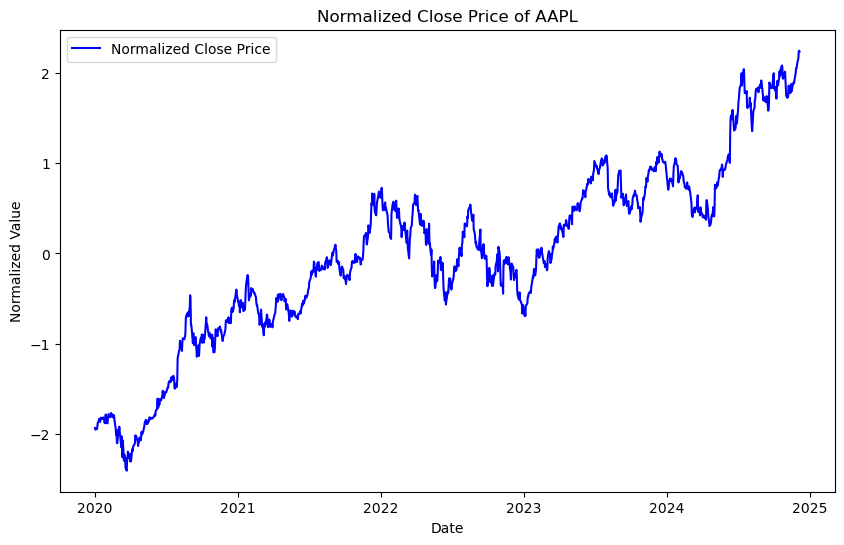

In [14]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6)) 
plt.plot(data.index, data['Normalized Close'], label='Normalized Close Price', color='blue')
plt.title('Normalized Close Price of AAPL') 
plt.xlabel('Date') 
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

In [15]:
# Calculate the 50-day moving average 
data['50-day SMA'] = data['Normalized Close'].rolling(window=50).mean()

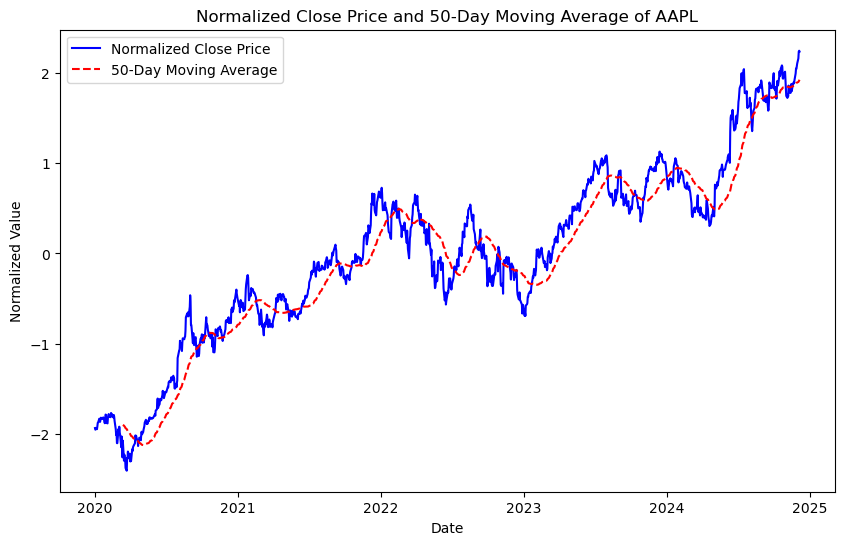

In [18]:
# Plot the normalized close and 50-day moving average 
plt.figure(figsize=(10,6)) 
plt.plot(data.index, data['Normalized Close'], label='Normalized Close Price', color='blue')
plt.plot(data.index, data['50-day SMA'], label='50-Day Moving Average', color='red', linestyle='--')

# Title and labels 
plt.title('Normalized Close Price and 50-Day Moving Average of AAPL') 
plt.xlabel('Date') 
plt.ylabel('Normalized Value') 

# Show legend 
plt.legend() 

plt.show()


In [19]:
# Generate signals based on crossover 
data['Signal'] = 0   # Default: no signal
data['Signal'][data['Normalized Close'] > data['50-day SMA']] = 1 # buy signal 
data['Signal'][data['Normalized Close'] < data['50-day SMA']] = -1 # sell signal 

/var/folders/ly/_b7t8ps95xlcy5kh9xks073c0000gn/T/ipykernel_97555/2046844042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Normalized Close'] > data['50-day SMA']] = 1 # buy signal
/var/folders/ly/_b7t8ps95xlcy5kh9xks073c0000gn/T/ipykernel_97555/2046844042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Normalized Close'] > data['50-day SMA']] = 1 # buy signal
/var/folders/ly/_b7t8ps95xlcy5kh9xks073c0000gn/T/ipykernel_97555/2046844042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

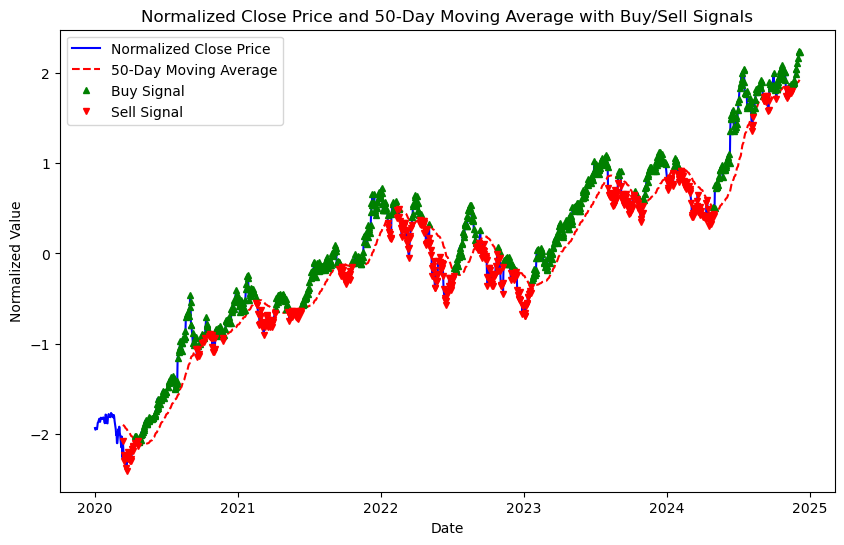

In [32]:
# Generate signals
data = data.copy()
data['Signal'] = 0  # Default: no signal
data.loc[data['Normalized Close'] > data['50-day SMA'], 'Signal'] = 1  # Buy signal
data.loc[data['Normalized Close'] < data['50-day SMA'], 'Signal'] = -1  # Sell signal

# Plot signals
plt.figure(figsize=(10,6))

# Plot normalized close and 50-day moving average
plt.plot(data.index, data['Normalized Close'], label='Normalized Close Price', color='blue')
plt.plot(data.index, data['50-day SMA'], label='50-Day Moving Average', color='red', linestyle='--')

# Plot Buy signals (green dots)
plt.plot(data.index[data['Signal'] == 1], data['Normalized Close'][data['Signal'] == 1], '^', markersize=5, color='green', lw=0, label='Buy Signal')

# Plot Sell signals (red dots)
plt.plot(data.index[data['Signal'] == -1], data['Normalized Close'][data['Signal'] == -1], 'v', markersize=5, color='red', lw=0, label='Sell Signal')

# Title and labels
plt.title('Normalized Close Price and 50-Day Moving Average with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Normalized Value')

# Show legend
plt.legend()

# Show the plot
plt.show()


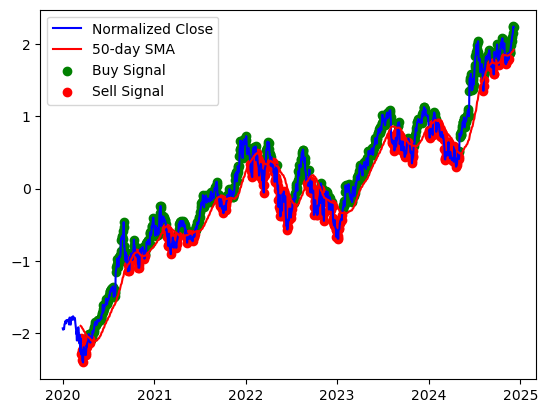

In [33]:
import matplotlib.pyplot as plt

# Assuming `data` has 'Normalized Close' and '50-day SMA' columns
buy_signals = data[data['Normalized Close'] > data['50-day SMA']]
sell_signals = data[data['Normalized Close'] < data['50-day SMA']]

plt.plot(data['Normalized Close'], label='Normalized Close', color='blue')
plt.plot(data['50-day SMA'], label='50-day SMA', color='red')

# Plot Buy signals as green dots
plt.scatter(buy_signals.index, buy_signals['Normalized Close'], marker='o', color='green', label='Buy Signal')

# Plot Sell signals as red dots
plt.scatter(sell_signals.index, sell_signals['Normalized Close'], marker='o', color='red', label='Sell Signal')

plt.legend()
plt.show()